In [1058]:
#importing required libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [1059]:
# Here to show all number of column and no of row
pd.set_option("display.max_columns",None)

pd.set_option("display.max_rows",None)

In [1060]:
# Here fetching the current working directory 
path = os.getcwd()
csv_path = path+"/Leads.csv"
print(csv_path)

/home/sweetline/Desktop/Lead Scoring Assignment/Leads.csv


In [1061]:
lead_data =pd.read_csv(csv_path)

In [1062]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1063]:
lead_data.shape

(9240, 37)

In [1064]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1065]:
#Checking descriptive statistics
lead_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [1066]:
# Check the number of missing values in each column

lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### As you can see there are a lot of column which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [1067]:
# Drop all the columns in which greater than 3000 missing values are present

for col in lead_data.columns:
    if lead_data[col].isnull().sum() > 3000:
        lead_data.drop(col,axis=1,inplace=True)

In [1068]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [1069]:
# Check the number of null values again

lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### As you might be able to interpret, the variable City won't be of any use in our analysis. So it's best that we drop it.

In [1070]:
lead_data.drop(['City'], axis = 1, inplace = True)

In [1071]:
# Let's now check the percentage of missing values in each column

round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1072]:
# Check the number of null values again

lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [1073]:
# Get the value counts of all the columns

for column in lead_data:
    print(lead_data[column].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa4f0ba5-5985-469f-8cd7-98f7b20d27ea    1
aa503b9c-f853-497f-a1cc-97d6b13312d1    1
aa52eef4-bd60-4c64-8d38-a30ba71b5110    1
aa5a7ddf-b20e-4e2e-a477-15227ca4e96a    1
aa5fb614-bf24-408d-9c89-e97b91d9479d    1
aa5ff9e9-bd5c-4a6e-bc03-e19552725635    1
aa613715-ff22-429d-9fbb-92da56b827aa    1
aa6fc8ca-ae09-4c9e-bae0-0427f5f56a70    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
aa1edcad-f74f-426c-881a-5bbaa5ce717d    1
aa02cd65-92f9-447c-8cc2-44b7b6f817fe    1
a9fab024-c486-4a99-a05d-aba8c6252dc8    1
a9c7f60c-930b-4504-a092-ab3ae2dc4578    1
a9b4f35e-6df5-4ed4-9753-f35753c08195    1
a9b52d1c-72a1-45f8-b013-32289dd31e81    1
a9b775f3-1c01-45b8-879

##### The following three columns now have the level 'Select'. Let's check them once again.

In [1074]:
lead_data['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [1075]:
lead_data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [1076]:
lead_data['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

#### Clearly the levels Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.

In [1077]:
lead_data.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

#### Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [1078]:
lead_data.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

#### Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [1079]:
lead_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [1080]:
lead_data = lead_data[~pd.isnull(lead_data['What is your current occupation'])]

In [1081]:
# Check the number of null values again

lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Converted                                           0
TotalVisits                                       130
Total Time Spent on Website                         0
Page Views Per Visit                              130
Last Activity                                     103
Country                                          1605
Specialization                                     18
What is your current occupation                     0
What matters most to you in choosing a course      19
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

#### Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [1082]:
# Drop the null value rows in the column 'TotalVisits'

lead_data = lead_data[~pd.isnull(lead_data['TotalVisits'])]

In [1083]:
# Check the number of null values again

lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        29
Do Not Email                                        0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          1475
Specialization                                     18
What is your current occupation                     0
What matters most to you in choosing a course      19
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [1084]:
# Drop the null values rows in the column 'Lead Source'

lead_data = lead_data[~pd.isnull(lead_data['Lead Source'])]

In [1085]:
# Check the number of null values again

lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          1447
Specialization                                     18
What is your current occupation                     0
What matters most to you in choosing a course      19
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [1086]:
lead_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

In [1087]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

lead_data.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [1088]:
# Check the number of null values again

lead_data.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Country                                   1447
Specialization                              18
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [1089]:
# Drop the null values rows in the column 'Specialization'

lead_data = lead_data[~pd.isnull(lead_data['Specialization'])]

In [1090]:
# Check the number of null values again

lead_data.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Country                                   1447
Specialization                               0
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [1091]:
lead_data = lead_data[~pd.isnull(lead_data['Country'])]

In [1092]:
# Check the number of null values again

lead_data.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

##### Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [1093]:
print(len(lead_data.index))
print(len(lead_data.index)/9240)

4926
0.5331168831168831


In [1094]:
# Let's look at the dataset again

lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Unemployed,No,Modified


In [1095]:

lead_data.shape

(4926, 15)

##### Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

## Prepare the data for modelling

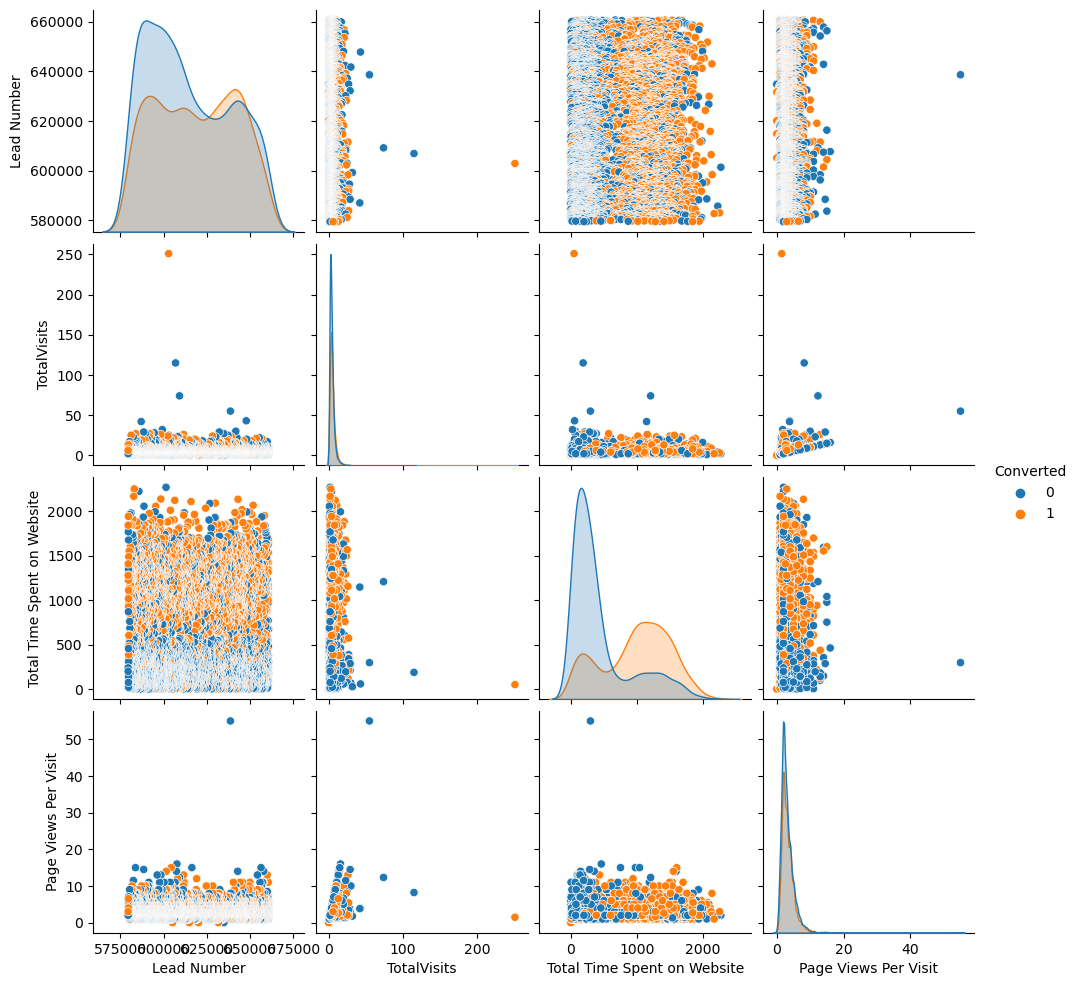

In [1096]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(lead_data,diag_kind="kde",hue='Converted')
plt.show()

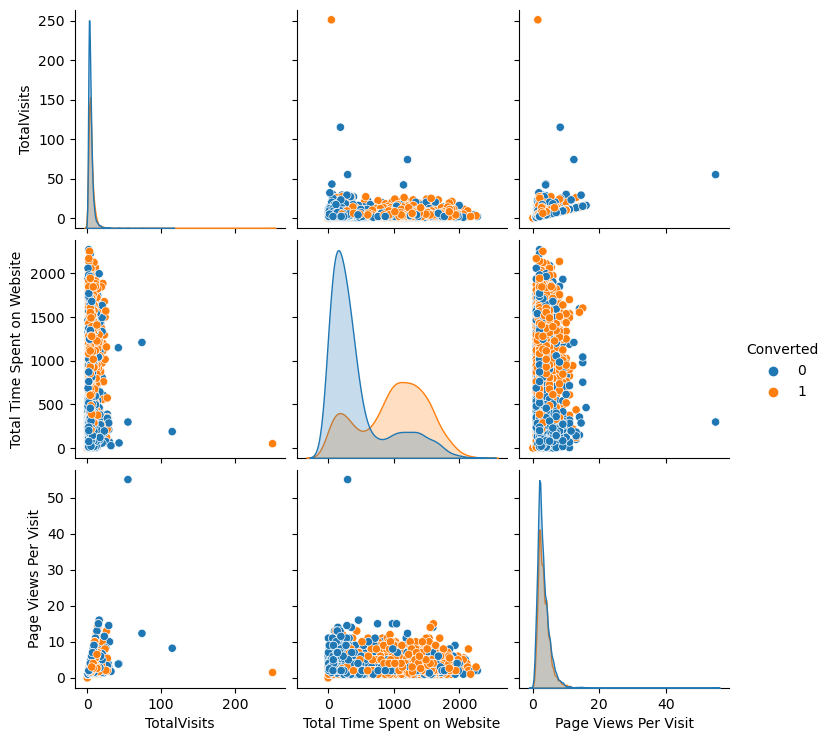

In [1097]:
lead_data_result = lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(lead_data_result,diag_kind='kde',hue='Converted')
plt.show()

In [1098]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformed_lead_data_result  = pd.DataFrame(pt.fit_transform(lead_data_result))
transformed_lead_data_result.columns = lead_data_result.columns
transformed_lead_data_result.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,0.540786,0.296896,-0.162011,-0.890268
1,-0.994164,1.301287,-0.593219,1.123258
2,-2.133551,-0.430337,-1.864849,-0.890268
3,-0.994164,1.203342,-1.864849,1.123258
4,-0.994164,1.398566,-0.593219,1.123258


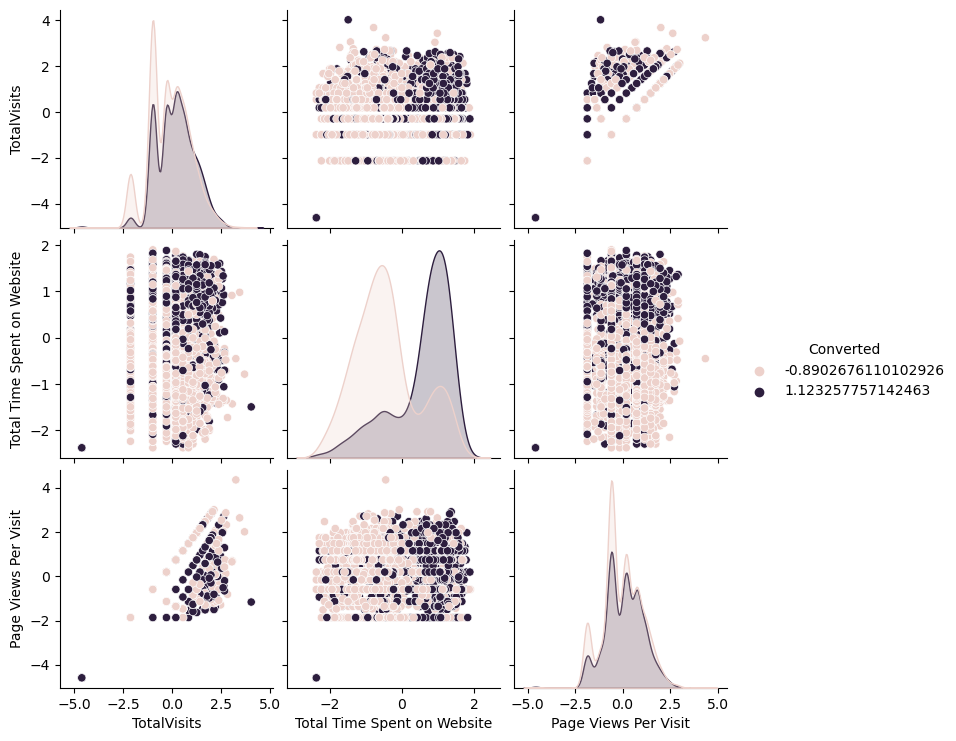

In [1099]:
sns.pairplot(transformed_lead_data_result,diag_kind='kde',hue='Converted')
plt.show()

### Dummy variable creation

#### The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [1100]:
# Check the columns which are of type 'object'

temp = lead_data.loc[:, lead_data.dtypes == 'object']
temp.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1101]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)

In [1102]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(lead_data['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
lead_data = pd.concat([lead_data, dummy_spl], axis = 1)

In [1103]:
# Drop the variables for which the dummy variables have been created

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [1104]:
# Let's take a look at the dataset again

lead_data.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,India,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,India,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,India,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,India,True,False,False,False,True,False,False,False,False,False,False,False,F

In [1105]:
# map bool into integer value.
bool_cols =lead_data.select_dtypes(include = "bool").columns.to_list()
print(bool_cols)
for col in bool_cols:
    lead_data[col] = lead_data[col].map({True: 1,False :0 })

['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_testone', 'Do Not Email_Yes', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'Last Activity_View in browser link Clicked', 'Last Activity_Visited Booth in Tradesh

In [1106]:
lead_data.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,India,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,India,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,India,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,India,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,1,2.0,1640,2.0,India,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1107]:
lead_data.shape

(4926, 76)

### Test-Train Split

#### The next step is to split the dataset into training an testing sets.

In [1108]:
# Import the required library

from sklearn.model_selection import train_test_split

In [1109]:
# Put all the feature variables in X

X = lead_data.drop(['Converted','Prospect ID','Country'], axis=1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1,660728,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,660673,2.0,1640,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [1110]:
# Put the target variable in y

y = lead_data['Converted']

y.head()

1    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [1111]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1112]:
X_train.shape

(3448, 73)

### Scaling

#### Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [1113]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [1114]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7442,592449,0.007968,0.716109,0.133333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6273,601722,0.027888,0.206426,0.466667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8640,583774,0.059761,0.458627,1.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
609,654123,0.019920,0.001761,0.111333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4543,616102,0.015936,0.188820,0.266667,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Looking at the correlations

#### Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [1115]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(lead_data.corr())
plt.show()

ValueError: could not convert string to float: '2a272436-5132-4136-86fa-dcc88c88f482'

<Figure size 2500x1500 with 0 Axes>

## Model Building

#### Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [1116]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(logreg)

LogisticRegression()


In [1117]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)           # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [1118]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', False, 12),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', False, 34),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 51),
 ('Lead Source_Press_Release', False, 57),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Social Media', False, 54),
 ('Lead Source_WeLearn', False, 46),
 ('Lead Source_Welingak Website', False, 38),
 ('Lead Source_bing', False, 53),
 ('Lead Source_testone', False, 55),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Marked 

In [1119]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [1120]:
col

Index(['Lead Number', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [1121]:
# Select only the columns selected by RFE
X_train =X_train[col]


In [1122]:
# Import statsmodels

import statsmodels.api as sm

In [1123]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3448
Model:                            GLM   Df Residuals:                     3432
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1602.4
Date:                Tue, 17 Sep 2024   Deviance:                       3204.8
Time:                        16:22:59   Pearson chi2:                 3.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3591
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.8721      1.263     -6.235      0.000     -10.347      -5.398
Lead Number                                           1.043e-05   1.97e-06      5.291      0.000    6.57e-06    1.43e-05
Total Time Spent on Website                              4.5764      0.193     23.731      0.000       4.198       4.954
Lead Origin_Landing Page Submission                     -0.2314      0.114     -2.036      0.042      -0.454      -0.009
Lead Source_Direct Traffic                              -0.3124      0.130     -2.396      0.017      -0.568      -0.057
Lead Source_Google                                       0.1263      0.125      1.010      0.312      -0.119       0.371
Do Not Email_Yes                                        -1.4024      0.224     -6.254      0.000      -1.842      -0.963
Last Activity_Converted to Lead                         -1.0238      0.277     -3.697      0.000      -1.567      -0.481
Last Activity_Email Opened                              -0.0574      0.164     -0.351      0.726      -0.378       0.263
Last Activity_Page Visited on Website                   -0.2199      0.204     -1.077      0.281      -0.620       0.180
Last Activity_SMS Sent                                   0.4848      0.238      2.036      0.042       0.018       0.952
What is your current occupation_Unemployed              -0.2129      0.242     -0.881      0.378      -0.687       0.261
What is your current occupation_Working Professional     2.6417      0.331      7.990      0.000       1.994       3.290
A free copy of Mastering The Interview_Yes               0.1048      0.118      0.885      0.376      -0.127       0.337
Last Notable Activity_Modified                          -0.5003      0.139     -3.593      0.000      -0.773      -0.227
Last Notable Activity_SMS Sent                           0.5599      0.254      2.205      0.027       0.062       1.058
========================================================================================================================
"""

In [1124]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1125]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,46.73
10,What is your current occupation_Unemployed,27.20
9,Last Activity_SMS Sent,10.37
14,Last Notable Activity_SMS Sent,9.94
7,Last Activity_Email Opened,5.51
2,Lead Origin_Landing Page Submission,5.07
11,What is your current occupation_Working Profes...,3.87
4,Lead Source_Google,3.43
3,Lead Source_Direct Traffic,3.29
12,A free copy of Mastering The Interview_Yes,3.13


#### VIFs seem to be in a decent range except for three variables. 

 #### Let's first drop the variable `What is your current occupation_Unemployed` since it has a high p-value as well as a high VIF.

In [1126]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

In [1127]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3448
Model:                            GLM   Df Residuals:                     3433
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1602.8
Date:                Tue, 17 Sep 2024   Deviance:                       3205.5
Time:                        16:23:04   Pearson chi2:                 3.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3590
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -8.0352      1.250     -6.430      0.000     -10.485      -5.586
Lead Number                                           1.037e-05   1.97e-06      5.262      0.000    6.51e-06    1.42e-05
Total Time Spent on Website                              4.5783      0.193     23.743      0.000       4.200       4.956
Lead Origin_Landing Page Submission                     -0.2323      0.114     -2.044      0.041      -0.455      -0.010
Lead Source_Direct Traffic                              -0.3101      0.130     -2.380      0.017      -0.566      -0.055
Lead Source_Google                                       0.1246      0.125      0.997      0.319      -0.120       0.370
Do Not Email_Yes                                        -1.4060      0.224     -6.270      0.000      -1.845      -0.967
Last Activity_Converted to Lead                         -1.0271      0.277     -3.709      0.000      -1.570      -0.484
Last Activity_Email Opened                              -0.0559      0.164     -0.342      0.733      -0.377       0.265
Last Activity_Page Visited on Website                   -0.2156      0.204     -1.056      0.291      -0.616       0.184
Last Activity_SMS Sent                                   0.4792      0.238      2.014      0.044       0.013       0.946
What is your current occupation_Working Professional     2.8465      0.235     12.094      0.000       2.385       3.308
A free copy of Mastering The Interview_Yes               0.1031      0.118      0.871      0.384      -0.129       0.335
Last Notable Activity_Modified                          -0.5008      0.139     -3.596      0.000      -0.774      -0.228
Last Notable Activity_SMS Sent                           0.5600      0.254      2.206      0.027       0.062       1.058
========================================================================================================================
"""

In [1128]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,19.68
9,Last Activity_SMS Sent,10.36
13,Last Notable Activity_SMS Sent,9.94
7,Last Activity_Email Opened,5.51
2,Lead Origin_Landing Page Submission,5.06
4,Lead Source_Google,3.43
3,Lead Source_Direct Traffic,3.29
11,A free copy of Mastering The Interview_Yes,3.12
12,Last Notable Activity_Modified,2.95
1,Total Time Spent on Website,2.67


In [1129]:
X_train.drop('Lead Number', axis = 1, inplace = True)

In [1130]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3448
Model:                            GLM   Df Residuals:                     3434
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1616.8
Date:                Tue, 17 Sep 2024   Deviance:                       3233.5
Time:                        16:23:09   Pearson chi2:                 3.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3538
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5605      0.196     -7.947      0.000      -1.945      -1.176
Total Time Spent on Website                              4.5849      0.192     23.879      0.000       4.209       4.961
Lead Origin_Landing Page Submission                     -0.2682      0.113     -2.375      0.018      -0.490      -0.047
Lead Source_Direct Traffic                              -0.3596      0.130     -2.777      0.005      -0.613      -0.106
Lead Source_Google                                       0.1435      0.125      1.153      0.249      -0.101       0.388
Do Not Email_Yes                                        -1.4651      0.223     -6.574      0.000      -1.902      -1.028
Last Activity_Converted to Lead                         -1.0356      0.274     -3.783      0.000      -1.572      -0.499
Last Activity_Email Opened                              -0.0653      0.164     -0.399      0.690      -0.387       0.256
Last Activity_Page Visited on Website                   -0.2401      0.203     -1.180      0.238      -0.639       0.159
Last Activity_SMS Sent                                   0.5092      0.238      2.137      0.033       0.042       0.976
What is your current occupation_Working Professional     2.8006      0.234     11.990      0.000       2.343       3.258
A free copy of Mastering The Interview_Yes               0.0941      0.118      0.798      0.425      -0.137       0.325
Last Notable Activity_Modified                          -0.4773      0.139     -3.436      0.001      -0.750      -0.205
Last Notable Activity_SMS Sent                           0.3962      0.252      1.574      0.115      -0.097       0.890
========================================================================================================================
"""

In [1131]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,9.84
12,Last Notable Activity_SMS Sent,9.39
1,Lead Origin_Landing Page Submission,4.94
2,Lead Source_Direct Traffic,3.13
10,A free copy of Mastering The Interview_Yes,3.02
3,Lead Source_Google,2.84
6,Last Activity_Email Opened,2.81
0,Total Time Spent on Website,2.50
11,Last Notable Activity_Modified,2.22
5,Last Activity_Converted to Lead,1.45


In [1132]:
X_train.drop('Last Activity_Email Opened', axis = 1, inplace = True)

In [1133]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3448
Model:                            GLM   Df Residuals:                     3435
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1616.8
Date:                Tue, 17 Sep 2024   Deviance:                       3233.7
Time:                        16:23:12   Pearson chi2:                 3.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3537
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6165      0.137    -11.766      0.000      -1.886      -1.347
Total Time Spent on Website                              4.5837      0.192     23.879      0.000       4.207       4.960
Lead Origin_Landing Page Submission                     -0.2707      0.113     -2.400      0.016      -0.492      -0.050
Lead Source_Direct Traffic                              -0.3607      0.129     -2.785      0.005      -0.615      -0.107
Lead Source_Google                                       0.1442      0.125      1.158      0.247      -0.100       0.388
Do Not Email_Yes                                        -1.4424      0.216     -6.690      0.000      -1.865      -1.020
Last Activity_Converted to Lead                         -1.0011      0.260     -3.853      0.000      -1.510      -0.492
Last Activity_Page Visited on Website                   -0.1955      0.170     -1.150      0.250      -0.529       0.138
Last Activity_SMS Sent                                   0.5424      0.223      2.429      0.015       0.105       0.980
What is your current occupation_Working Professional     2.7991      0.234     11.987      0.000       2.341       3.257
A free copy of Mastering The Interview_Yes               0.0951      0.118      0.807      0.420      -0.136       0.326
Last Notable Activity_Modified                          -0.4539      0.126     -3.609      0.000      -0.700      -0.207
Last Notable Activity_SMS Sent                           0.4197      0.245      1.716      0.086      -0.060       0.899
========================================================================================================================
"""

In [1134]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_SMS Sent,9.33
7,Last Activity_SMS Sent,9.22
1,Lead Origin_Landing Page Submission,4.61
2,Lead Source_Direct Traffic,2.94
9,A free copy of Mastering The Interview_Yes,2.92
3,Lead Source_Google,2.33
0,Total Time Spent on Website,2.31
10,Last Notable Activity_Modified,2.18
5,Last Activity_Converted to Lead,1.37
6,Last Activity_Page Visited on Website,1.19


In [1135]:
X_train.drop('A free copy of Mastering The Interview_Yes', axis = 1, inplace = True)

In [1136]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3448
Model:                            GLM   Df Residuals:                     3436
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1617.2
Date:                Tue, 17 Sep 2024   Deviance:                       3234.3
Time:                        16:23:16   Pearson chi2:                 3.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3536
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5875      0.132    -11.987      0.000      -1.847      -1.328
Total Time Spent on Website                              4.5850      0.192     23.886      0.000       4.209       4.961
Lead Origin_Landing Page Submission                     -0.2412      0.107     -2.262      0.024      -0.450      -0.032
Lead Source_Direct Traffic                              -0.3434      0.128     -2.690      0.007      -0.594      -0.093
Lead Source_Google                                       0.1069      0.116      0.925      0.355      -0.120       0.333
Do Not Email_Yes                                        -1.4463      0.216     -6.711      0.000      -1.869      -1.024
Last Activity_Converted to Lead                         -1.0045      0.260     -3.867      0.000      -1.514      -0.495
Last Activity_Page Visited on Website                   -0.1923      0.170     -1.131      0.258      -0.526       0.141
Last Activity_SMS Sent                                   0.5439      0.223      2.436      0.015       0.106       0.982
What is your current occupation_Working Professional     2.7942      0.233     11.976      0.000       2.337       3.251
Last Notable Activity_Modified                          -0.4563      0.126     -3.629      0.000      -0.703      -0.210
Last Notable Activity_SMS Sent                           0.4170      0.245      1.705      0.088      -0.062       0.896
========================================================================================================================
"""

In [1137]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_SMS Sent,9.33
7,Last Activity_SMS Sent,9.22
1,Lead Origin_Landing Page Submission,3.72
2,Lead Source_Direct Traffic,2.76
0,Total Time Spent on Website,2.27
9,Last Notable Activity_Modified,2.18
3,Lead Source_Google,2.13
5,Last Activity_Converted to Lead,1.37
6,Last Activity_Page Visited on Website,1.19
8,What is your current occupation_Working Profes...,1.14


In [1138]:
X_train.drop('Last Activity_SMS Sent', axis = 1, inplace = True)

In [1139]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3448
Model:                            GLM   Df Residuals:                     3437
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1620.1
Date:                Tue, 17 Sep 2024   Deviance:                       3240.2
Time:                        16:23:19   Pearson chi2:                 3.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3525
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5911      0.132    -12.031      0.000      -1.850      -1.332
Total Time Spent on Website                              4.5919      0.192     23.940      0.000       4.216       4.968
Lead Origin_Landing Page Submission                     -0.2342      0.106     -2.200      0.028      -0.443      -0.026
Lead Source_Direct Traffic                              -0.3408      0.128     -2.673      0.008      -0.591      -0.091
Lead Source_Google                                       0.1101      0.115      0.954      0.340      -0.116       0.336
Do Not Email_Yes                                        -1.4568      0.215     -6.788      0.000      -1.877      -1.036
Last Activity_Converted to Lead                         -1.1351      0.254     -4.474      0.000      -1.632      -0.638
Last Activity_Page Visited on Website                   -0.2629      0.167     -1.572      0.116      -0.591       0.065
What is your current occupation_Working Professional     2.8003      0.233     11.993      0.000       2.343       3.258
Last Notable Activity_Modified                          -0.3316      0.114     -2.918      0.004      -0.554      -0.109
Last Notable Activity_SMS Sent                           0.9552      0.105      9.059      0.000       0.749       1.162
========================================================================================================================
"""

In [1140]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,3.72
2,Lead Source_Direct Traffic,2.76
0,Total Time Spent on Website,2.27
3,Lead Source_Google,2.13
8,Last Notable Activity_Modified,1.82
9,Last Notable Activity_SMS Sent,1.62
5,Last Activity_Converted to Lead,1.29
6,Last Activity_Page Visited on Website,1.16
7,What is your current occupation_Working Profes...,1.14
4,Do Not Email_Yes,1.12


In [1141]:
X_train.drop('Lead Source_Google', axis = 1, inplace = True)

In [1142]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3448
Model:                            GLM   Df Residuals:                     3438
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1620.6
Date:                Tue, 17 Sep 2024   Deviance:                       3241.1
Time:                        16:23:23   Pearson chi2:                 3.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3523
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5252      0.112    -13.563      0.000      -1.746      -1.305
Total Time Spent on Website                              4.5980      0.192     23.983      0.000       4.222       4.974
Lead Origin_Landing Page Submission                     -0.2238      0.106     -2.115      0.034      -0.431      -0.016
Lead Source_Direct Traffic                              -0.4172      0.099     -4.204      0.000      -0.612      -0.223
Do Not Email_Yes                                        -1.4641      0.214     -6.833      0.000      -1.884      -1.044
Last Activity_Converted to Lead                         -1.1447      0.254     -4.513      0.000      -1.642      -0.648
Last Activity_Page Visited on Website                   -0.2640      0.167     -1.580      0.114      -0.591       0.063
What is your current occupation_Working Professional     2.7995      0.234     11.989      0.000       2.342       3.257
Last Notable Activity_Modified                          -0.3306      0.114     -2.909      0.004      -0.553      -0.108
Last Notable Activity_SMS Sent                           0.9529      0.105      9.042      0.000       0.746       1.160
========================================================================================================================
"""

## Model Evaluation

#### Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [1143]:
X_train.shape

(3448, 9)

In [1144]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

ValueError: shapes (3448,10) and (16,) not aligned: 10 (dim 1) != 16 (dim 0)

In [ ]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [1145]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.807964
1,0,0.287675
2,0,0.787958
3,0,0.099905
4,1,0.946423


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [1146]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.807964,1
1,0,0.287675,0
2,0,0.787958,1
3,0,0.099905,0
4,1,0.946423,1


#### Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [1147]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [1148]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1608  304]
 [ 440 1096]]


In [1149]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7842227378190255


In [1150]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1151]:
# Calculate the sensitivity

TP/(TP+FN)

0.7135416666666666

In [1152]:
# Calculate the specificity

TN/(TN+FP)

0.8410041841004184

### Finding the Optimal Cutoff

#### Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [1153]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1154]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [1155]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

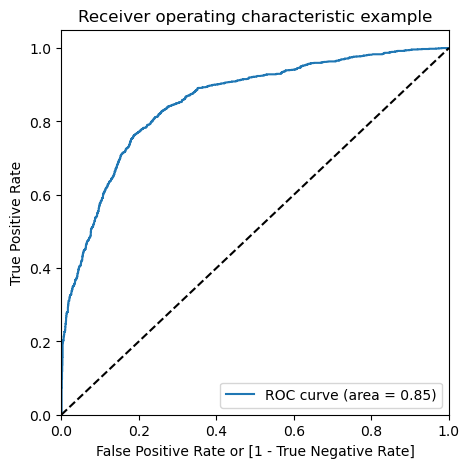

In [1156]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [1157]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.807964,1,1,1,1,1,1,1,1,1,1,0
1,0,0.287675,0,1,1,1,0,0,0,0,0,0,0
2,0,0.787958,1,1,1,1,1,1,1,1,1,0,0
3,0,0.099905,0,1,0,0,0,0,0,0,0,0,0
4,1,0.946423,1,1,1,1,1,1,1,1,1,1,1


In [1158]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.445476  1.000000  0.000000
0.1   0.1  0.535093  0.983073  0.175209
0.2   0.2  0.690835  0.921224  0.505753
0.3   0.3  0.761891  0.863281  0.680439
0.4   0.4  0.782483  0.791016  0.775628
0.5   0.5  0.784223  0.713542  0.841004
0.6   0.6  0.767981  0.631510  0.877615
0.7   0.7  0.738979  0.516276  0.917887
0.8   0.8  0.703016  0.385417  0.958159
0.9   0.9  0.648492  0.220052  0.992678


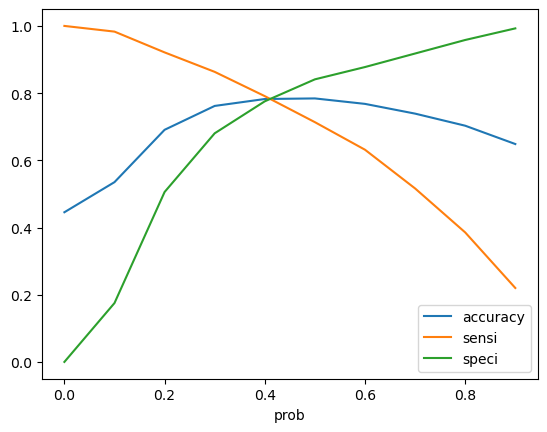

In [1159]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1160]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.807964,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.287675,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.787958,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.099905,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.946423,1,1,1,1,1,1,1,1,1,1,1,1


In [1161]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7865429234338747

In [1162]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1517,  395],
       [ 341, 1195]])

In [1163]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1164]:
# Calculate Sensitivity

TP/(TP+FN)

0.7779947916666666

In [1165]:
# Calculate Specificity

TN/(TN+FP)

0.7934100418410042

## Making Predictions on the Test Set

#### Let's now make predicitons on the test set.

In [1166]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [1167]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Lead Number,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
5891,604721,0.030810,1,1,0,1,0,0,0,0,1,0,1,1,0
7967,588751,0.579665,1,1,0,0,0,1,0,0,1,0,1,0,0
2815,632746,0.411532,0,0,0,1,0,0,1,0,1,0,1,0,0
4532,616185,0.720511,1,0,1,0,0,1,0,0,1,0,0,0,0
5844,605086,0.108275,1,0,1,0,0,0,0,1,1,0,0,0,1


In [1168]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [1169]:
# Check X_test_sm

X_test_sm

,const,Lead Number,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Opened,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
5891,1.0,604721,0.030810,1,1,0,1,0,0,0,0,1,0,1,1,0
7967,1.0,588751,0.579665,1,1,0,0,0,1,0,0,1,0,1,0,0
2815,1.0,632746,0.411532,0,0,0,1,0,0,1,0,1,0,1,0,0
4532,1.0,616185,0.720511,1,0,1,0,0,1,0,0,1,0,0,0,0
5844,1.0,605086,0.108275,1,0,1,0,0,0,0,1,1,0,0,0,1
2483,1.0,635850,0.187500,1,1,0,0,0,0,0,1,0,1,1,0,1
7361,1.0,592984,0.026849,0,0,0,0,0,0,0,1,1,0,0,0,1
5651,1.0,606643,0.130722,1,0,0,0,0,0,0,1,0,1,0,0,1
1750,1.0,642352,0.461708,1,0,1,0,0,0,0,1,1,0,0,1,0
8924,1.0,581919,0.185299,1,1,0,0,1,0,0,0,1,0,1,1,0


In [1173]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [1175]:
y_test_pred[:10]

5891    0.018393
7967    0.553104
2815    0.246306
4532    0.814251
5844    0.416395
2483    0.946170
7361    0.324890
5651    0.924814
1750    0.647583
8924    0.041909
dtype: float64

In [1176]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [1177]:
# Let's see the head

y_pred_1.head()

,0
5891,0.018393
7967,0.553104
2815,0.246306
4532,0.814251
5844,0.416395


In [1178]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1179]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1180]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1181]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.018393
1,1,0.553104
2,0,0.246306
3,1,0.814251
4,0,0.416395


In [1182]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [1183]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.018393
1,1,0.553104
2,0,0.246306
3,1,0.814251
4,0,0.416395


In [1184]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [1185]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.018393,0
1,1,0.553104,1
2,0,0.246306,0
3,1,0.814251,1
4,0,0.416395,0


In [1186]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7916102841677943

In [1187]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[663, 173],
       [135, 507]])

In [1188]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1189]:
# Calculate Precision

TP/(TP+FP)

0.7455882352941177

In [1190]:
# Calculate Recall

TP/(TP+FN)

0.7897196261682243

## Making Predictions on the Test Set

#### Let's now make predicitons on the test set.

In [1191]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [1192]:
y_test_pred[:10]

5891    0.018393
7967    0.553104
2815    0.246306
4532    0.814251
5844    0.416395
2483    0.946170
7361    0.324890
5651    0.924814
1750    0.647583
8924    0.041909
dtype: float64

In [1193]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [1194]:
# Let's see the head

y_pred_1.head()

,0
5891,0.018393
7967,0.553104
2815,0.246306
4532,0.814251
5844,0.416395


In [1195]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1196]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1197]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1198]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.018393
1,1,0.553104
2,0,0.246306
3,1,0.814251
4,0,0.416395


In [1199]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [1200]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.018393
1,1,0.553104
2,0,0.246306
3,1,0.814251
4,0,0.416395


In [1201]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [1202]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.018393,0
1,1,0.553104,1
2,0,0.246306,0
3,1,0.814251,1
4,0,0.416395,0


In [1203]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7949932341001353

In [1204]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[682, 154],
       [149, 493]])

In [1205]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1206]:
# Calculate Precision

TP/(TP+FP)

0.7619783616692427

In [1207]:
# Calculate Recall

TP/(TP+FN)

0.7679127725856698

## Summary

Initial Lead Scoring and Prioritization
Expand scoring metrics: Consider additional factors such as demographic information, engagement with marketing materials (e.g., emails, social media), and website behavior (e.g., downloads, video views).
Utilize predictive analytics: Employ tools to analyze historical data and predict the likelihood of conversion based on various factors.
Implement a tiered scoring system: Categorize leads into different tiers (e.g., hot, warm, cold) based on their scores, allowing for targeted nurturing efforts.
Enhanced Lead Nurturing
Personalized content automation: Use marketing automation tools to deliver personalized content based on lead behavior and preferences.
Multi-channel engagement: Employ a combination of email, SMS, social media, and personalized calls to maintain consistent contact.
Gamification: Incorporate gamified elements into the nurturing process to increase engagement and interest.
A/B testing: Experiment with different nurturing strategies to identify the most effective approaches.
Effective Lead Conversion
Value-based selling: Focus on the benefits and value proposition of your offerings rather than solely on features.
Objection handling: Anticipate and address common objections to increase conversion rates.
Limited-time offers: Create a sense of urgency with time-sensitive promotions or discounts.
Testimonials and case studies: Showcase the success stories of satisfied customers to build trust.
Post-Conversion Engagement
Customer onboarding: Provide a smooth and effective onboarding process to ensure customer satisfaction.
Customer success management: Assign dedicated representatives to assist customers and address their needs.
Upselling and cross-selling: Identify opportunities to offer additional products or services that align with customer needs.
Customer feedback and loyalty programs: Gather feedback to improve your offerings and encourage repeat business.
Continuous Optimization
Regular data analysis: Track key metrics (e.g., conversion rates, customer lifetime value) to measure performance and identify areas for improvement.
Iterative refinement: Continuously refine your lead nurturing and conversion strategies based on data-driven insights.
Stay updated on industry trends: Keep abreast of emerging technologies and best practices in lead generation and conversion.